
# Datos geográficos



In [1]:
import urllib
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

Los datos georreferenciados representan ubicaciones exactas sobre la superficie terrestre. Sin embargo, es todo un reto representar en forma precisa una posición en la Tierra cuando ésta tiene una forma irregular. Esto se termina relacionando con el problema de cómo mostrar sobre superficies planas rasgos geográficos que pertenecen a una superficie tridimensional esférica. 
Es por ésto que se desarrollan los Sistemas de coordenadas de referencia (CRS -en inglés-), y de proyecciones cartográficas.

* Los CRS son un sistema de números que definen ubicaciones sobre la superficie de la Tierra; funcionan como direcciones. (Ej: el CRS que usa latitud y longitud para definir posiciones en los ejes norte-sur y este-oeste)

* Las proyecciones cartográficas son instrucciones para traducir a un plano la disposición de puntos ubicados en la esfera terrestre. Como en toda traducción, hay algo que se pierde en el proceso. 

Es por éste motivo que existen distintas proyecciones de la Tierra, cada una pensada para minimizar alguno de los tipos de distorsión, o para encontrar una solución de compromiso que los balancée.

La proyección más utilizada en la actualidad es la "Mercator", ésta se diseñó originalmente para asistir la navegación marítima. Su fortaleza es que no distorsiona las direcciones, por lo que permite fijar el rumbo de navegación consultando el mapa. Su principal problema es que produce una distorsión notable en las áreas cercanas a los polos.

## Formatos de archivos

El formato más común es el denominado “shapefile”. Éste formato guarda la información en varios archivos distintos, generalmente combinados en un archivo .zip para su distribución. 

Uno de los inconvenientes que puede tener éste tipo de formato adempas de que ser de archivo múltiple es que los nombres de las variables dentro del shapefile deben tener 10 caracteres o menos, lo que puede causar abreviaturas ininteligibles. 
Es por ello que los archivos en formatos “GeoJSON” vienen a corregir éstos inconvenientes.



---> Muestro como leer de la API un GEOJSON (sólo tiene el centroide) (http://apis.datos.gob.ar/georef/api/provincias?formato=geojson)
---> Muestro como leer de la API un SHP filtrado (sólo las provincias que empiezan con "san"). Pero advierto que el SHP completeo de todas las provincias puede ser muy pesado-
---> Muestro como cargo el SHP completo (ya descargado) de provincias

In [2]:
# El formato json puede leerse a partir de lo siguientes comandos:
url = "https://apis.datos.gob.ar/georef/api/provincias?campos=completo"
response = requests.get(url)
response.json()
# El problema de éste archivo es que la variable "geometry" está como punto y no polígono por lo que no serviría para representar las provincias con su forma original.

#explicar como utilizar las herramientas de la api georef
#http://apis.datos.gob.ar/georef/api/direcciones?direccion=%22nicolas%20descalzi%205586%22&aplanar&formato=csv

#tener en cuenta que los formatospueden ser csv, geojson, json, xml.

#Para saber los recursos en el orden correcto ir a https://apis.datos.gob.ar/georef/api

{'cantidad': 24,
 'inicio': 0,
 'parametros': {'campos': ['centroide.lon',
   'id',
   'centroide.lat',
   'nombre',
   'nombre_completo',
   'fuente',
   'iso_id',
   'categoria',
   'iso_nombre']},
 'provincias': [{'categoria': 'Provincia',
   'centroide': {'lat': -26.8753965086829, 'lon': -54.6516966230371},
   'fuente': 'IGN',
   'id': '54',
   'iso_id': 'AR-N',
   'iso_nombre': 'Misiones',
   'nombre': 'Misiones',
   'nombre_completo': 'Provincia de Misiones'},
  {'categoria': 'Provincia',
   'centroide': {'lat': -33.7577257449137, 'lon': -66.0281298195836},
   'fuente': 'IGN',
   'id': '74',
   'iso_id': 'AR-D',
   'iso_nombre': 'San Luis',
   'nombre': 'San Luis',
   'nombre_completo': 'Provincia de San Luis'},
  {'categoria': 'Provincia',
   'centroide': {'lat': -30.8653679979618, 'lon': -68.8894908486844},
   'fuente': 'IGN',
   'id': '70',
   'iso_id': 'AR-J',
   'iso_nombre': 'San Juan',
   'nombre': 'San Juan',
   'nombre_completo': 'Provincia de San Juan'},
  {'categoria':

In [15]:
#la capa de provincias en formato shp se puede descargar de https://apis.datos.gob.ar/georef/api/provincias?formato=shp
provincias = gpd.read_file("datos/provincias/provincias.shp", encoding="utf8")
ejes= world[~(world["name"]=="Argentina")].plot(color="c")
#los colores para utilizar están en el siguiente link="https://matplotlib.org/examples/color/named_colors.html"
provincias.plot(ax=ejes, color="lightgray", figsize=(10,20))
plt.xlim(-75, -50)
plt.ylim(-60, -20);

NameError: name 'world' is not defined

In [ ]:
provincias["nam"]=provincias["nam"].str.lower().str.strip()
pd.merge(rem_trim_ult_trim,provincias, left_on="provincias", right_on="nam")

In [ ]:
#Para crear las coordenadas de algún dataset que contenga direcciones que permitan georeferenciarse
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
provincias = gpd.read_file('datos/provincias/provincias.shp')

dataset = pd.read_csv("https://apis.datos.gob.ar/georef/api/provincias?formato=csv")
dataset["coordenadas"]=list(zip(dataset.provincia_centroide_lat, dataset.provincia_centroide_lon))
dataset['coordenadas'] = dataset['coordenadas'].apply(Point)
prov_punto = gpd.GeoDataFrame(dataset, geometry='coordenadas')

ejes= world[~(world["name"]=="Argentina")].plot(color="c")
provincias.plot(ax=ejes, color="lightgray", figsize=(10,20))
prov_punto.plot(ax=ejes, color="r", markersize=4)
plt.xlim(-75, -50)
plt.ylim(-60, -20);

## Mapa de calor

In [ ]:
#Desde la librerrbía de geopandas es posible contar con la representación de todos los paises del mundo a partir de la variable "world" a partir del comando:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

# Para la escala de colores que queremos utilizar consultamos los colores en: "https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html"
world.plot(column='gdp_per_cap', cmap=plt.cm.twilight, legend=True)

In [ ]:
# mergear provincias con un dataframe de datos de salud por provincia

En éste apartado tomaremos un datasets externo al archivo geojson o shp que contiene las provincias georeferenciadas para poder tomar el dato de interés a representar y mergear con el dato georeferenciado y visualizarlo en el mapa.

Como ejemplo tomaremos un datasets de Seguridad que provee la cantidad de delitos informados al Sistema Nacional de Información Criminal por provincias. 

In [ ]:
df_snic= pd.read_csv("https://estadisticascriminales.minseg.gob.ar/datos/snic-provincias.csv")

In [ ]:

df_snic = pd.read_csv("datos/snic-provincias.csv")

Acá vemos 2 tipos de errores que pueden surgirnos al trabajar con los datasets de seguridad.
* El primero corresponde a errores de permisos al servidor que brinda la información 
* El segundo a que no estamos considerando el elemento de separación por columnas.
Tomando en consideración éstos inconvenientes, lo solucionamos descargando el datasets desde la página de datos.gov.ar, lo agregamos al la carpeta de trabajo del repo y señalamos el elemento de separación.

In [4]:
df_snic = pd.read_csv("datos/snic-provincias.csv", sep=";")

In [5]:
df_snic

,anio,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,2,Ciudad Autsnoma de Buenos Aires,1,Homicidios dolosos,185.0,200.0
1,2014,2,Ciudad Autsnoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,54.0,68.0
2,2014,2,Ciudad Autsnoma de Buenos Aires,3,Homicidios cuposos en siniestros viales,82.0,102.0
3,2014,2,Ciudad Autsnoma de Buenos Aires,4,Homicidios cuposos por otros hechos,23.0,24.0
4,2014,2,Ciudad Autsnoma de Buenos Aires,5,Lesiones dolosas,18679.0,21175.0
5,2014,2,Ciudad Autsnoma de Buenos Aires,2,Lesiones culposas en siniestros viales,9009.0,10562.0
6,2014,2,Ciudad Autsnoma de Buenos Aires,7,Lesiones culposas por otros hechos,2773.0,3133.0
7,2014,2,Ciudad Autsnoma de Buenos Aires,8,Otros delitos contra las personas,533.0,623.0
8,2014,2,Ciudad Autsnoma de Buenos Aires,9,Delitos contra el honor,0.0,0.0
9,2014,2,Ciudad Autsnoma de Buenos Aires,10,Violaciones,267.0,291.0


In [7]:
provincias

,centr_lon,id,centr_lat,nombre,geometry
0,-54.6516966230371,54,-26.8753965086829,Misiones,"(POLYGON ((-54.109057346 -25.539824102, -54.11..."
1,-66.0281298195836,74,-33.7577257449137,San Luis,"POLYGON ((-67.055470113 -31.856052636, -67.049..."
2,-68.8894908486844,70,-30.8653679979618,San Juan,"POLYGON ((-67.32964173800001 -32.358826402, -6..."
3,-59.2014475514635,30,-32.0588735436448,Entre Ríos,"POLYGON ((-58.581376706 -30.160100982, -58.581..."
4,-69.9557621671973,78,-48.8154851827063,Santa Cruz,"(POLYGON ((-71.54708990899999 -45.999754002, -..."
5,-67.229329893694,62,-40.4057957178801,Río Negro,"(POLYGON ((-64.76547241199999 -40.783512115, -..."
6,-68.5267593943345,26,-43.7886233529878,Chubut,(POLYGON ((-71.85479930299989 -43.496446493999...
7,-63.8017532741662,14,-32.142932663607,Córdoba,"POLYGON ((-63.873713817 -29.6237749749999, -63..."
8,-68.5831228183798,50,-34.6298873058957,Mendoza,POLYGON ((-69.12569695099999 -32.0028349849999...
9,-67.1817359694432,46,-29.685776298315,La Rioja,"POLYGON ((-68.520825454 -27.8198800829999, -68..."


In [8]:
df_snic = pd.read_csv(
    "datos/snic-provincias.csv", sep=";", decimal=",",
    converters={
        "provincia_id": lambda x: str(x).zfill(2)
    }
)
df_snic

,anio,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,02,Ciudad Autsnoma de Buenos Aires,1,Homicidios dolosos,185,200
1,2014,02,Ciudad Autsnoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,54,68
2,2014,02,Ciudad Autsnoma de Buenos Aires,3,Homicidios cuposos en siniestros viales,82,102
3,2014,02,Ciudad Autsnoma de Buenos Aires,4,Homicidios cuposos por otros hechos,23,24
4,2014,02,Ciudad Autsnoma de Buenos Aires,5,Lesiones dolosas,18679,21175
5,2014,02,Ciudad Autsnoma de Buenos Aires,2,Lesiones culposas en siniestros viales,9009,10562
6,2014,02,Ciudad Autsnoma de Buenos Aires,7,Lesiones culposas por otros hechos,2773,3133
7,2014,02,Ciudad Autsnoma de Buenos Aires,8,Otros delitos contra las personas,533,623
8,2014,02,Ciudad Autsnoma de Buenos Aires,9,Delitos contra el honor,0,0
9,2014,02,Ciudad Autsnoma de Buenos Aires,10,Violaciones,267,291


In [9]:
len(provincias), len(df_snic)

(24, 3552)

In [10]:
len(df_snic[df_snic.anio == 2018])

720

In [11]:
df_snic[(df_snic.anio == 2018) & (df_snic.codigo_delito_snic_id == 1)]

,anio,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
2832,2018,02,Ciudad de Buenos Aires,1,Homicidios dolosos,133,137
2862,2018,06,Buenos Aires,1,Homicidios dolosos,951,992
2892,2018,10,Catamarca,1,Homicidios dolosos,6,6
2922,2018,14,Csrdoba,1,Homicidios dolosos,102,108
2952,2018,18,Corrientes,1,Homicidios dolosos,27,28
2982,2018,22,Chaco,1,Homicidios dolosos,51,53
3012,2018,26,Chubut,1,Homicidios dolosos,46,46
3042,2018,30,Entre Rmos,1,Homicidios dolosos,68,77
3072,2018,34,Formosa,1,Homicidios dolosos,38,38
3102,2018,38,Jujuy,1,Homicidios dolosos,19,19


In [12]:
len(df_snic[(df_snic.anio == 2018) & (df_snic.codigo_delito_snic_id == 1)])

24

In [13]:
victimas_homicidios_2018 = df_snic[(df_snic.anio == 2018) & (df_snic.codigo_delito_snic_id == 1)][["provincia_id", "cantidad_victimas"]]

victimas_homicidios_2018["cantidad_victimas"] = victimas_homicidios_2018["cantidad_victimas"].astype(int) 
victimas_homicidios_2018

,provincia_id,cantidad_victimas
2832,02,137
2862,06,992
2892,10,6
2922,14,108
2952,18,28
2982,22,53
3012,26,46
3042,30,77
3072,34,38
3102,38,19


In [14]:
provincias_seguridad = provincias.merge(victimas_homicidios_2018, left_on="id", right_on="provincia_id")

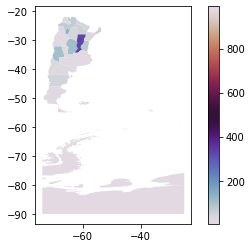

In [15]:
provincias_seguridad.plot(column='cantidad_victimas', cmap=plt.cm.twilight, legend=True)

## Normalización direcciones

In [16]:
import requests as rqs

In [17]:
direccion = 'Honduras 3755, CABA'
provincia = 'caba'
url_base ='https://apis.datos.gob.ar/georef/api/direcciones?direccion={}&provincia={}'
url_base.format(direccion, provincia)

'https://apis.datos.gob.ar/georef/api/direcciones?direccion=Honduras 3755, CABA&provincia=caba'

In [18]:
r = rqs.get(url_base.format(direccion, provincia))
r.json()

{'cantidad': 1,
 'direcciones': [{'altura': {'unidad': None, 'valor': 3755},
   'calle': {'categoria': 'AV',
    'id': '0209801001415',
    'nombre': 'AV HONDURAS'},
   'calle_cruce_1': {'categoria': None, 'id': None, 'nombre': None},
   'calle_cruce_2': {'categoria': None, 'id': None, 'nombre': None},
   'departamento': {'id': '02098', 'nombre': 'Comuna 14'},
   'localidad_censal': {'id': '02000010',
    'nombre': 'Ciudad Autónoma de Buenos Aires'},
   'nomenclatura': 'AV HONDURAS 3755, Comuna 14, Ciudad Autónoma de Buenos Aires',
   'piso': None,
   'provincia': {'id': '02', 'nombre': 'Ciudad Autónoma de Buenos Aires'},
   'ubicacion': {'lat': -34.59407315430296, 'lon': -58.41550703113384}}],
 'inicio': 0,
 'parametros': {'direccion': {'altura': {'unidad': None, 'valor': '3755'},
   'calles': ['Honduras'],
   'piso': None,
   'tipo': 'simple'},
  'provincia': 'caba'},
 'total': 1}

In [19]:
r.json()["parametros"]

{'direccion': {'altura': {'unidad': None, 'valor': '3755'},
  'calles': ['Honduras'],
  'piso': None,
  'tipo': 'simple'},
 'provincia': 'caba'}

In [20]:
data = r.json()
data['direcciones'][0]

{'altura': {'unidad': None, 'valor': 3755},
 'calle': {'categoria': 'AV', 'id': '0209801001415', 'nombre': 'AV HONDURAS'},
 'calle_cruce_1': {'categoria': None, 'id': None, 'nombre': None},
 'calle_cruce_2': {'categoria': None, 'id': None, 'nombre': None},
 'departamento': {'id': '02098', 'nombre': 'Comuna 14'},
 'localidad_censal': {'id': '02000010',
  'nombre': 'Ciudad Autónoma de Buenos Aires'},
 'nomenclatura': 'AV HONDURAS 3755, Comuna 14, Ciudad Autónoma de Buenos Aires',
 'piso': None,
 'provincia': {'id': '02', 'nombre': 'Ciudad Autónoma de Buenos Aires'},
 'ubicacion': {'lat': -34.59407315430296, 'lon': -58.41550703113384}}

In [21]:
data['direcciones'][0]['ubicacion']

{'lat': -34.59407315430296, 'lon': -58.41550703113384}

In [22]:
direccion = ['Belgrano 637',
'Balcarce 50',
'Av San Martin 935']

df = pd.DataFrame(data=direccion,columns=['direccion'])
df

,direccion
0,Belgrano 637
1,Balcarce 50
2,Av San Martin 935


In [23]:
def interpretar_direccion(direccion):
    url_base ='https://apis.datos.gob.ar/georef/api/direcciones?direccion={}'
    r = requests.get(url_base.format(direccion))
    data = r.json()
    ubicacion = data['direcciones'][0]['ubicacion']
    return Point((ubicacion['lat'], ubicacion['lon']))

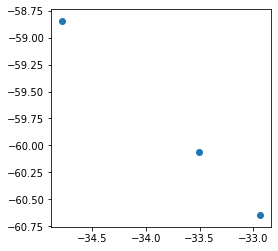

In [24]:
df['geometry'] = df["direccion"].apply(interpretar_direccion)
dfs = gpd.GeoDataFrame(df, geometry='geometry')
dfs.plot()

In [25]:

efectores_salud.head()

NameError: name 'efectores_salud' is not defined

In [ ]:
results = []
for i in list(range(10)):
    results.append(i + 10)
results

In [ ]:
[i + 10 for i in  list(range(10))]

In [ ]:
direcciones_para_georef = [
    (row[1]["domicilio"], str(row[1]["provincia_id"]).zfill(2)) for row in
    efectores_salud[["domicilio", "provincia_id"]].drop_duplicates().iterrows()
]

In [ ]:
len(direcciones_para_georef)

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]

In [ ]:
a.append(7)

In [ ]:
a

In [ ]:
a.extend(b)

In [ ]:
a

In [ ]:
direcciones_georreferenciadas = []
for limit in range(1000,26000,1000):
    direcciones_georreferenciadas.extend(get_similar_bulk(direcciones_para_georef[limit - 1000:limit]))

In [ ]:
len(efectores_salud)

In [10]:
efectores_salud= pd.read_csv("./est_salud.csv")
direccion= efectores_salud["domicilio"]
localidad= efectores_salud["localidad_nombre"]
provincia= efectores_salud["provincia_nombre"]

In [ ]:
def interpretar_direccion(direccion, provincia):
    url_base ='https://apis.datos.gob.ar/georef/api/direcciones?direccion={}&provincia={}&'
    r = requests.get(url_base.format(direccion, provincia))
    data = r.json()
    ubicacion = data['direcciones'][0]['ubicacion'] if len(data['direcciones']) > 0 else {"lat": None, "lon": None}
    if ubicacion["lat"] and ubicacion["lon"]:
        return Point((ubicacion['lat'], ubicacion['lon']))
    else:
        return None

In [ ]:
def interpretar_direccion_desde_df(row):
    print(row)
    return interpretar_direccion(row["domicilio"], row["provincia_id"])

In [ ]:
efectores_salud["geometry"] = efectores_salud.apply(interpretar_direccion_desde_df, axis=1)
efectores_salud.head()

In [ ]:
geo_efectores_salud = gpd.GeoDataFrame(efectores_salud, geometry='geometry')
geo_efectores_salud.plot()

In [ ]:
efectores_salud.concat("direccion", "provincia_nombre")